In [1]:
%matplotlib inline

In [2]:
#Import Libraries
from urllib.request import urlopen
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, add_image, FontManager

In [3]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/""Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/""Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/""Roboto-Medium.ttf?raw=true"))

In [4]:
#read data from excel file
import pandas as pd 
df = pd.read_excel('player.xlsx')

#filter data with players who have played more than 180 minutes
df = df[df['Minutes'] > 180]
df = df[df['Player position']!="Goalkeeper"]



In [5]:
#create seperate columns for percentile rank of Goals, Assists, Shots, Shot On Target, Open Play Shots, Attacking Third Touches
df['Goals_Percentile_Rank'] = df['Goals'].rank(pct=True)
df['Assists_Percentile_Rank'] = df['Assists'].rank(pct=True)

df['Shots_Percentile_Rank'] = df['Shots'].rank(pct=True)
df['Shot_On_Target_Percentile_Rank'] = df['Shot On Target'].rank(pct=True)
df['Chances Created_Percentile_Rank'] = df['Total Chances Created New'].rank(pct=True)
df['Crosses_Percentile_Rank'] = df['Crosses'].rank(pct=True)


df['Touches_Percentile_Rank'] = df['Touches'].rank(pct=True)
df['Attacking_Third_Touches_Percentile_Rank'] = df['Attacking Third Touches'].rank(pct=True)
df['Passes_Percentile_Rank'] = df['Passes'].rank(pct=True)
df['Attacking_Third_Passes_Percentile_Rank'] = df['Good Pass Attack Third'].rank(pct=True)
df['Forward_Passes_Percentile_Rank'] = df['Forward Passes'].rank(pct=True)
df['Passes in Opposition Box_Percentile_Rank'] = df['In Opposition Box'].rank(pct=True)

df['Tackle_Percentile_Rank'] = df['Tackles'].rank(pct=True)
df['Interceptions_Percentile_Rank'] = df['Interception'].rank(pct=True)
df['Clearance_Percentile_Rank'] = df['Clearance'].rank(pct=True)
df['Aerial Duel Won_Percentile_Rank'] = df['Aerial Duel Won'].rank(pct=True)




In [6]:
#input player name
player_name = input("Enter player name: ")



In [7]:
#Get values of the player_name for different columns
player_goals_percentile_rank = df.loc[df['Name'] == player_name, 'Goals_Percentile_Rank'].values[0]
player_assists_percentile_rank = df.loc[df['Name'] == player_name, 'Assists_Percentile_Rank'].values[0]
player_shots_percentile_rank = df.loc[df['Name'] == player_name, 'Shots_Percentile_Rank'].values[0]
player_shot_on_target_percentile_rank = df.loc[df['Name'] == player_name, 'Shot_On_Target_Percentile_Rank'].values[0]
player_chances_created_percentile_rank = df.loc[df['Name'] == player_name, 'Chances Created_Percentile_Rank'].values[0]
player_crosses_percentile_rank = df.loc[df['Name'] == player_name, 'Crosses_Percentile_Rank'].values[0]

player_touches_percentile_rank = df.loc[df['Name'] == player_name, 'Touches_Percentile_Rank'].values[0]
player_attacking_third_touches_percentile_rank = df.loc[df['Name'] == player_name, 'Attacking_Third_Touches_Percentile_Rank'].values[0]
player_passes_percentile_rank = df.loc[df['Name'] == player_name, 'Passes_Percentile_Rank'].values[0]
player_attacking_third_passes_percentile_rank = df.loc[df['Name'] == player_name, 'Attacking_Third_Passes_Percentile_Rank'].values[0]
player_forward_passes_percentile_rank = df.loc[df['Name'] == player_name, 'Forward_Passes_Percentile_Rank'].values[0]
player_passes_in_opposition_box_percentile_rank = df.loc[df['Name'] == player_name, 'Passes in Opposition Box_Percentile_Rank'].values[0]

player_tackle_percentile_rank = df.loc[df['Name'] == player_name, 'Tackle_Percentile_Rank'].values[0]
player_interceptions_percentile_rank = df.loc[df['Name'] == player_name, 'Interceptions_Percentile_Rank'].values[0]
player_clearance_percentile_rank = df.loc[df['Name'] == player_name, 'Clearance_Percentile_Rank'].values[0]
player_aerial_duel_won_percentile_rank = df.loc[df['Name'] == player_name, 'Aerial Duel Won_Percentile_Rank'].values[0]




#Create a list for all the values and multiply by 100
player_percentile_rank_list = [player_goals_percentile_rank*100, 
                                player_assists_percentile_rank*100, 
                                player_shots_percentile_rank*100, 
                                player_shot_on_target_percentile_rank*100,
                                player_chances_created_percentile_rank*100, 
                                player_crosses_percentile_rank*100, 
                                player_attacking_third_touches_percentile_rank*100, 
                                player_passes_percentile_rank*100, 
                                player_tackle_percentile_rank*100, 
                                player_interceptions_percentile_rank*100, 
                                player_clearance_percentile_rank*100, 
                                player_aerial_duel_won_percentile_rank*100]


In [8]:
#round the list to 2 decimal places
player_percentile_rank_list = [round(elem, 2) for elem in player_percentile_rank_list]

#print the list
print(player_percentile_rank_list)


[95.16, 98.71, 92.9, 96.13, 82.9, 62.9, 81.29, 40.97, 23.55, 39.35, 23.23, 55.48]


In [9]:
# parameter list
params = ["Goals",
            "Assists",
            "Shots",
            "Shot On Target",
            "Chances Created ",
            "Crosses",
            "Attacking Third Touches",
            "Passes",
            "Tackles",
            "Interception",
            "Clearance",
            "Aerial Duel Won"]


# value list
values = player_percentile_rank_list

# color for the slices and text
slice_colors = ["#1A78CF"] * 4 + ["#FF9300"] * 4 + ["#D70232"] * 4
text_colors = ["#F2F2F2"] * 4 + ["#000000"] * 4 + ["#F2F2F2"] * 4


In [10]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


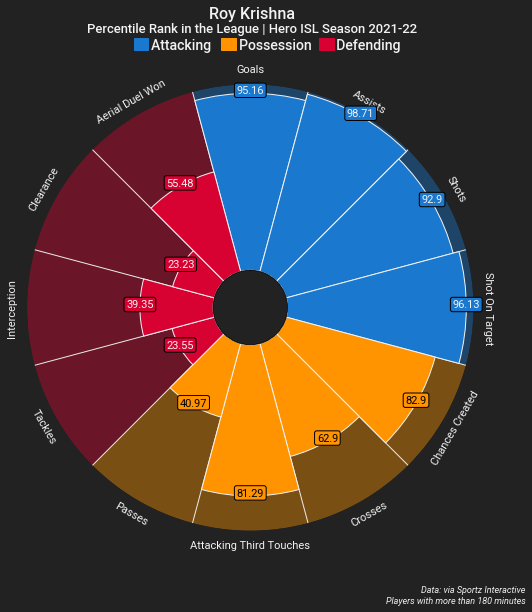

In [11]:
# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#f2f2f2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)


fig.text(
   0.515, 0.975, player_name, size=16,
   ha="center", fontproperties=font_bold.prop, color="#F2F2F2")

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank in the League | Hero ISL Season 2021-22",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "Data: via Sportz Interactive"
CREDIT_2 = "Players with more than 180 minutes"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

plt.show()

In [12]:
#save plot in the same directory as the plot with date at the end of the filename
import datetime as dt
fig.savefig(f"{player_name}_pizza_{dt.datetime.now().strftime('%d-%m-%Y')}.png", dpi=500)

